# Forum Group Discussion MK Praktikum Unggulan (Praktikum DGX)
---
Forum Group Discussion ini dilaksanakan sebagai wadah diskusi peserta untuk mendalami materi yang berkaitan dengan MK Praktikum Unggulan (Praktikum DGX), guna mendukung pemahaman konsep, analisis permasalahan, serta penerapan materi sesuai dengan ruang lingkup program studi.

# Memprediksi Harga Laptop Menggunakan Data Spesifikasi Laptop
---
Hands-on ini bertujuan untuk menganalisis dan memprediksi harga laptop berdasarkan data pada laptop_price-dataset

<a id='home'></a>
<h2>Daftar Isi</h2>

- <a href=#CRISP_DM>CRISP-DM</a>
- <a href=#Business>Business Understanding</a>
- <a href=#Understanding>Data Understanding</a>
- <a href=#Preparation>Data Preparation</a>
- <a href=#Modelling>Modelling</a>
- <a href=#Evaluation>Evaluation Model</a>
- <a href=#Deployment>Deployment</a>

## CRISP-DM (Cross Industry Standard Process for Data Mining)
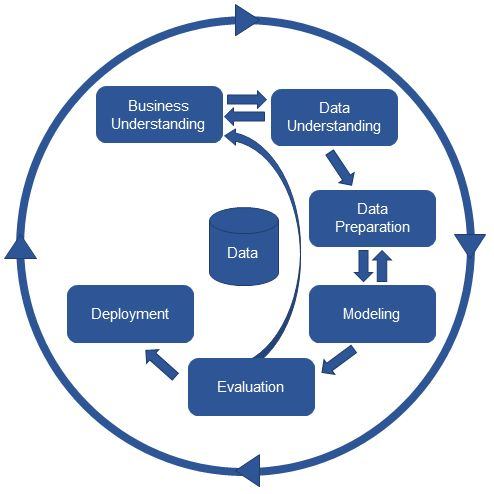

CRISP-DM adalah metodologi standar dalam proses data mining dan machine learning yang terdiri dari 6 tahap utama:
- Business Understanding: Menentukan tujuan bisnis dan masalah yang ingin diselesaikan menggunakan data, dan menemukan pola atau masalah pada data.
- Data Understanding: Mengumpulkan data awal, memahami karakteristik data, mengecek kualitas data, dan menemukan pola atau masalah pada data.
- Data Preparation: Melakukan pembersihan data, menangani missing value, memilih fitur dan menyiapkan data agar siap digunakan dalam modeling.
- Modeling: Membangun model machine learning menggunakan algoritma tertentu dan menyesuaikan parameter agar hasil optimal.
- Evaluation: Mengevaluasi performa model berdasarkan metrik tertentu untuk memastikan model sudah sesuai dengan tujuan bisnis.
- Deployment: Menerapkan model ke lingkungan agar dapat digunakan oleh pengguna atau sistem lain.

<a id='Business'></a>
# Business Understanding
<hr>
Business Understanding merupakan tahapan awal dalam analisis data untuk memahami masalah bisnis yang sebenarnya.

### Latar Belakang
Perkembangan teknologgi membuat laptop menjadi kebutuhan primer bagi pelajar khususnya mahasiswa dan juga pekerja kantoran. Harga laptop sangat bervariasi tergantung pada spesifikasi dari laptop tersebut di pasaran


Banyak konsumen kesulitan menentukan apakah harga laptop sudah sesuai dengan spesifikasi yang ditawarkan. Jika dari sisi penjual, diperlukan juga strategi untuk penentuan harga agar tidak terlalu mahal atau murah


Karena harga laptop dipengaruhi oleh banyak faktor, project ini diharapkan dapat membantu memahami hubungan antara spesifikasi laptop dan harganya untuk menentukan harga yang pas bagi konsumen dan juga penjual

### Permasalahan
Bagaimana cara memprediksi harga laptop secara akurat berdasarkan fitur atau spesifikasi yang dimiliki laptop menggunakan pendekatan model Linear Regression?

### Tujuan
Tujuan dari proyek ini adalah:

1. Mengetahui seberapa besar pengaruh masing-masing fitur (misalnya RAM,storage, CPU, dll.) terhadap harga.

2. Membangun model Linear Regression untuk memprediksi harga laptop.


3. Mengevaluasi performa model dalam melakukan prediksi harga.

<a id='Understanding'></a>
# Data Understanding
<hr>
Tahap Data Understanding ini bertujuan untuk :

* Memahami struktur dan isi dataset
* Mengidentifikasi variabel input dan output
* Menelaah data dengan metode statistik
* Menelaah data dengan metode visualisasi

Dataset bisa didownload melalui tautan : https://www.kaggle.com/datasets/ironwolf437/laptop-price-dataset

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib
import re

Penjelasan Library yang digunakan :
* <code>pandas</code> Digunakan untuk mengelola dan memanipulasi data dalam bentuk tabel (DataFrame), seperti membaca data, membersihkan, dan menganalisis data.
* <code>matplotlib</code> : Library untuk visualisasi data, seperti membuat grafik garis, scatter plot, histogram, dan grafik lainnya.
* <code>intrain_test_splitfo</code> : Digunakan untuk membagi data menjadi data latih (training) dan data uji (testing) agar model dapat dievaluasi dengan baik.
* <code>StandardScaler</code> : Digunakan untuk normalisasi fitur, yaitu mengubah data agar memiliki mean 0 dan standar deviasi 1 sehingga performa model lebih optimal.
* <code>LinearRegression</code> : Digunakan untuk membuat model regresi linear yang mempelajari hubungan antara variabel input (fitur) dan variabel output (target).
* <code>mean_absolute_error, mean_squearred_error, r2_score</code> : Digunakan untuk mengukur performa model regresi
* <code>numpy</code> : Library untuk komputasi numerik, seperti operasi array, matriks, dan perhitungan matematika yang efisien.
* <code>joblib</code> : Digunakan untuk menyimpan dan memuat model machine learning agar dapat digunakan kembali tanpa melatih ulang.


### Melihat 5 data teratas dan terakhir

In [5]:
# Memuat file csv ke dataframe pandas
df = pd.read_csv('laptop_price - dataset.csv')

In [6]:
# Menampilkan 5 data teratas
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [7]:
# Menampilkan 5 data terakhir
df.tail()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.0
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.0
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.0
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.0
1274,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel,Celeron Dual Core N3050,1.6,4,500GB HDD,Intel,HD Graphics,Windows 10,2.20,369.0


### Ringkasan Informasi dan Statistik Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

Fungsi <code>.info()</code> memberikan informasi ringkas tentang dataset, termasuk jumlah baris dan kolom, nama kolom, tipe data, serta jumlah nilai non-null dan penggunaan memori.

In [9]:
df.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


<code>.describe()</code> digunakan untuk memberikan ringkasan statistik deskriptif dari dataset. Fungsi ini menyediakan informasi seperti jumlah data non-null, rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum.

Dari ringkasan di atas dapat diketahui beberapa hal, di antaranya :

🔍 1. Gambaran Umum Dataset
* Jumlah data: 1275 laptop
* Jumlah fitur: 15 kolom
* Missing value: ❌ Tidak ada (semua 1275 non-null) → dataset bersih, enak buat modeling
* Tipe data:
  * Numerik: Inches, CPU_Frequency, RAM, Weight, Price
  * Kategorikal: Company, TypeName, CPU_Type, GPU_Type, OpSys, dll.

💰 2. Insight tentang Harga Laptop (Price)
* Harga sangat bervariasi
* Rentang harga lebar banget (174 → 6099 euro).

  → Ada laptop entry-level sampai high-end / workstation / gaming.
* Distribusi kemungkinan skew ke kanan (right-skewed)
Mean (1134) > Median (989)

  → Ada beberapa laptop mahal yang “menarik rata-rata ke atas”.

🎯 Insight Utama

Berdasarkan analisis statistik deskriptif, harga laptop dalam dataset menunjukkan variasi yang sangat besar dengan indikasi distribusi condong ke kanan akibat keberadaan laptop kelas high-end. Spesifikasi seperti RAM, frekuensi CPU, ukuran layar, dan berat memiliki rentang nilai yang luas sehingga berpotensi kuat memengaruhi harga. Dataset juga tidak memiliki nilai hilang, sehingga siap digunakan untuk proses pemodelan setelah preprocessing pada variabel kategorikal.

### Memeriksa nilai unik untuk setiap kolom kategorikal

In [10]:
# Cek nilai unik setiap kolom

# Memilih kolom yang hanya bertipe data object
object_col = df.select_dtypes(include=['object'])

# Melihat nilai unik dari setiap kolom bertipe data object
for column in object_col:
    unique_values = df[column].unique()
    value_counts = df[column].value_counts()

    print(f"Nilai unik pada kolom {column} : ")
    print(unique_values)

    print("\nJumlah dari setiap nilai uniknya: ")
    print(value_counts)

    print("-" * 30)
    print("")

Nilai unik pada kolom Company : 
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']

Jumlah dari setiap nilai uniknya: 
Company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64
------------------------------

Nilai unik pada kolom Product : 
['MacBook Pro' 'Macbook Air' '250 G6' 'Aspire 3' 'ZenBook UX430UN'
 'Swift 3' 'Inspiron 3567' 'MacBook 12"' 'IdeaPad 320-15IKB' 'XPS 13'
 'Vivobook E200HA' 'Legion Y520-15IKBN' '255 G6' 'Inspiron 5379'
 '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)' 'MacBook Air' 'Inspiron 5570'
 'Latitude 5590' 'ProBook 470' 'LapBook 15.6"'
 'E402WA-GA010T (E2-6110/2

### Deteksi missing values

In [11]:
#Memeriksa nilai yang hilang pada setiap kolom
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
CPU_Company,0
CPU_Type,0
CPU_Frequency (GHz),0
RAM (GB),0
Memory,0


### Deteksi Duplikasi Data





In [12]:
# Mencari nilai duplikat yang ada pada dataset
nilai_duplikat = df.duplicated().sum()
print("Jumlah nilai duplikat pada dataset: ", nilai_duplikat)

Jumlah nilai duplikat pada dataset:  0


###Deteksi Outlier
Outlier adalah nilai yang jauh berbeda dari mayoritas data lainnya

In [13]:
# Memilih kolom numerik
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outlier_count = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)].shape[0]
    print(f"{col}: {outlier_count} outlier")

Inches: 37 outlier
CPU_Frequency (GHz): 2 outlier
RAM (GB): 219 outlier
Weight (kg): 45 outlier
Price (Euro): 28 outlier


### Matriks Korelasi
Tabel yang menunjukkan tingkat hubungan (korelasi) antara setiap pasangan variabel numerik dalam suatu dataset.

In [14]:
# Mengetahui korelasi fitur antar kolom numerik saja
corr = df.corr(numeric_only=True)
corr

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
Inches,1.000000,0.305037,0.241078,0.826638,0.066608
CPU_Frequency (GHz),0.305037,1.000000,0.366254,0.318649,0.428847
RAM (GB),0.241078,0.366254,1.000000,0.389370,0.740287
Weight (kg),0.826638,0.318649,0.389370,1.000000,0.211883
Price (Euro),0.066608,0.428847,0.740287,0.211883,1.000000


<code>.corr()</code> digunakan untuk menghitung korelasi antar fitur kolom, dimana kuat/tidaknya korelasi ditentukan dari rentang nilai -1 higga 1

<Axes: >

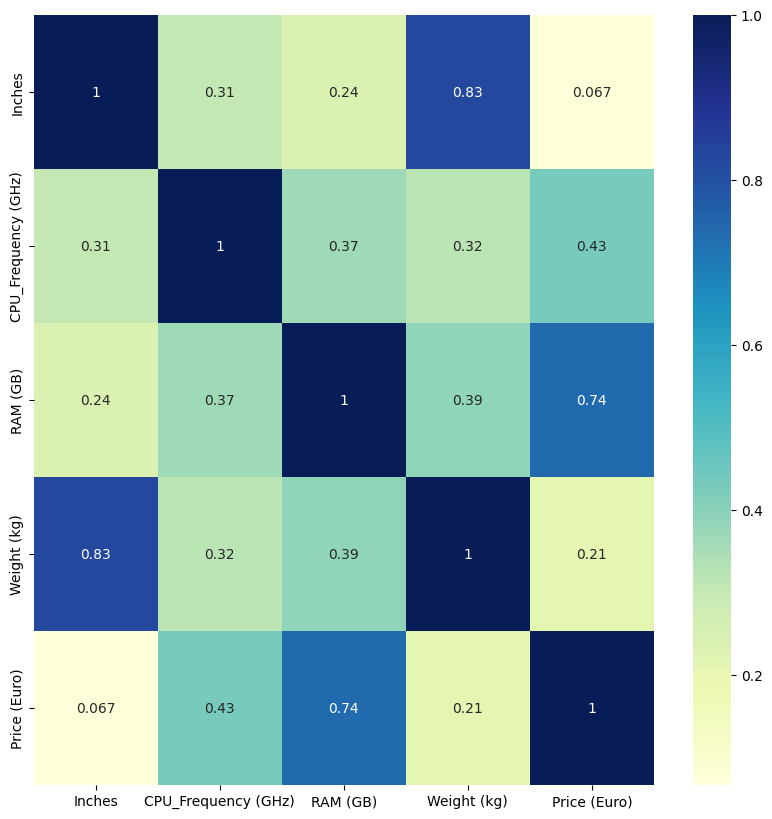

In [15]:
# Mengetahui korelasi fitur antar kolom menggunakan heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap="YlGnBu")

<code>.heatmap()</code> digunakan untuk memvisualisasikan matriks korelasi dalam bentuk peta warna (heatmap). Visualisasi ini membantu menunjukkan kekuatan dan arah hubungan antar fitur, dimana perbedaan warna merepresentasikan nilai korelasi yang dihasilkan dari fungsi <code>.corr()</code>


Heatmap diatas menunjukan korelasi antar kolom numerik yang berada pada laptop_price dataset

Angka di dalam kotak adalah nilai korelasi (Pearson):
- Nilai mendekati 1 → hubungan kuat positif

- Nilai mendekati 0 → hubungan lemah

- Nilai negatif → hubungan berlawanan arah

Warna:

🔵 Biru tua → korelasi kuat

🟢 Hijau → korelasi sedang

🟡 Kuning pucat → korelasi lemah / hampir tidak ada

Karena kolom yang ingin diprediksi adalah 'Price', maka dapat disimpulkan :
* inches → Price : 🟡 Korelasinya sangat lemah
* Cpu_Freq → Price : 🟢 Korelasinya cukup lemah
* RAM → Price : 🔵 Korelasinya cukup kuat
* Weight → Price : 🟡 Korelasinya sangat lemah



## Analisis Univariate
Pengertian: Analisis yang melibatkan satu variabel tunggal.

Tujuan: Untuk memahami distribusi dan karakteristik dasar dari variabel tersebut.

array([[<Axes: title={'center': 'Inches'}>,
        <Axes: title={'center': 'CPU_Frequency (GHz)'}>],
       [<Axes: title={'center': 'RAM (GB)'}>,
        <Axes: title={'center': 'Weight (kg)'}>],
       [<Axes: title={'center': 'Price (Euro)'}>, <Axes: >]], dtype=object)

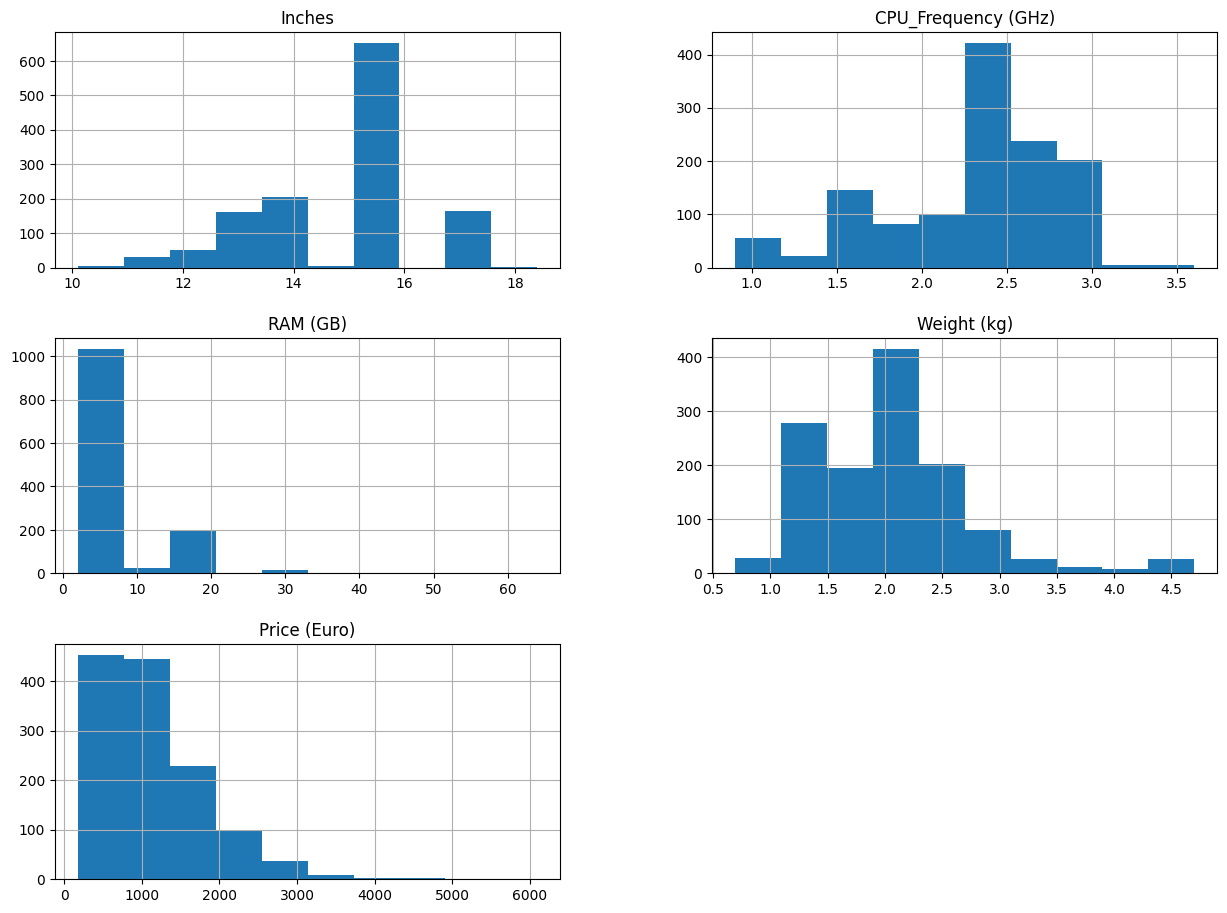

In [16]:
# Mengetahui persebaran nilai pada setiap kolom
df.hist(figsize=(15,11))

<code>.hist()</code> merupakan kode untuk melakukan histogram plot, dimana pada plot ini daapt dilihat persebaran data/nilai dari masing-masing kolom

Dari histogram plot di atas dapat diketahui beberapa hal, di antaranya :
- 🖥️ 1. Inches (Ukuran Layar) : cenderung ke tengah (tidak terlalu menyebar)
  - Mayoritas laptop ada di 14–16 inci, terutama 15.6” (standar pasar).
  - Sedikit laptop kecil (10–12”) → netbook / ultracompact.
  - Sedikit juga yang besar (17–18”) → gaming / workstation.
- ⚙️ 2. CPU Frequency (GHz) : sedikit condong ke kanan, banyak di tengah
  - Kebanyakan CPU di rentang 2.0 – 2.7 GHz (kelas mainstream).
  - Ada sedikit CPU rendah (≈1 GHz) → low-end.
  - Ada CPU tinggi (3.0–3.6 GHz) → performa tinggi.
- 💾 3. RAM (GB) : penyebaran datanya condong ke kiri
  - Data menumpuk besar di 4 GB dan 8 GB.
  - Sedikit di 16 GB.
  - Sangat sedikit di 32–64 GB (outlier kelas high-end).
- ⚖️ 4. Weight (kg) : mendekati normal tetapi agak miring
  - Mayoritas laptop di 1.5 – 2.5 kg.
  - Yang sangat ringan (<1.2 kg) sedikit → ultrabook premium.
  - Yang berat (>3 kg) sedikit → gaming/workstation.
- 💰 5. Price (Euro)
  - Banyak laptop harga 500–1500 euro (pasar utama).
  - Sedikit laptop mahal banget sampai 6000 euro.
  - Ada outlier harga tinggi.


<Axes: >

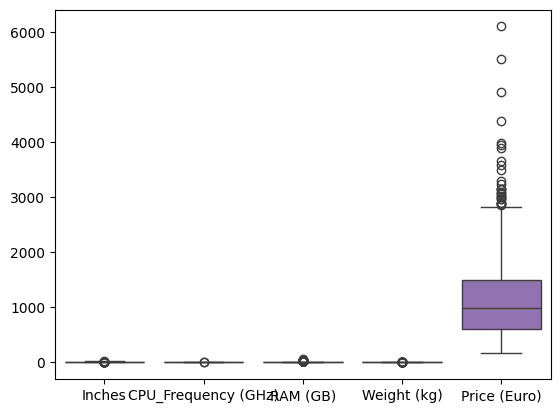

In [17]:
# Memeriksa outlier pada setiap kolom
sns.boxplot(data=df)

<code>.boxplot()</code> merupakan kode untuk membuat boxplot, dimana plot ini menampilkan nilai minimum, maksimum, kuartil, dan median. Boxplot juga digunakan untuk mendeteksi outlier, yaitu nilai yang berada jauh di luar sebaran utama data.

Garis di tengah kotak adalah Median
- Nilai tengah data (50% data di bawah, 50% di atas).

Garis di atas dan bawah kotak adalah Q1 dan Q3
- Q1 (Kuartil 1): batas 25% data terbawah
- Q3 (Kuartil 3): batas 75% data teratas

Panjang kotak adalah IQR (Interquartile Range)
- IQR = Q3 − Q1
- Menunjukan sebaran datanya

Garis ke atas & bawah (Whisker)
- Menunjukkan jangkauan data normal

Titik di luar whisker adalah outlier

Dari boxplot di atas dapat diketahui beberapa hal, di antaranya :
- Setiap kolom memiliki nilai outlier yang cukup banyak

## Analisis Bivariate
Pengertian: Analisis yang melibatkan dua variabel untuk memahami hubungan antara keduanya.

Tujuan: Untuk menentukan korelasi atau asosiasi antara dua variabel.

<Axes: xlabel='RAM (GB)', ylabel='Price (Euro)'>

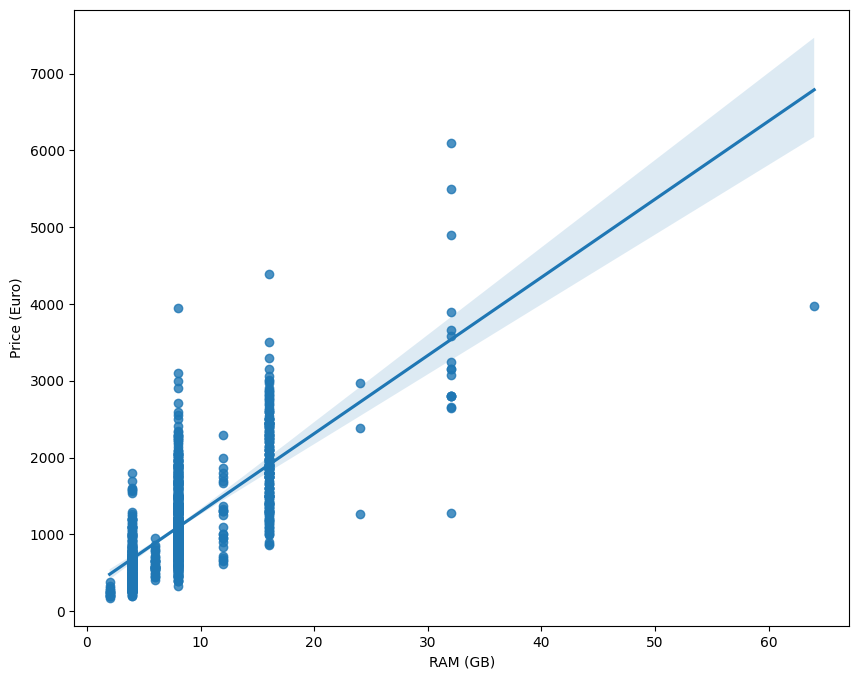

In [18]:
# Mengecek hubungan antara fitur RAM vs Price (Scatterplot)
plt.figure(figsize=(10, 8))
sns.regplot(data=df, x='RAM (GB)', y='Price (Euro)')

<code>.regplot()</code> diguunakan untuk mengetahui hubungan antara dua variabel numerik + garis regresinya

Untuk korelasi antara RAM dengan Price menunjukan pola titik dan garis yang membentuk tren naik yang hampir linear
Ini menunjukkan bahwa hubungan linear cukup kuat.

<Axes: xlabel='Weight (kg)', ylabel='Price (Euro)'>

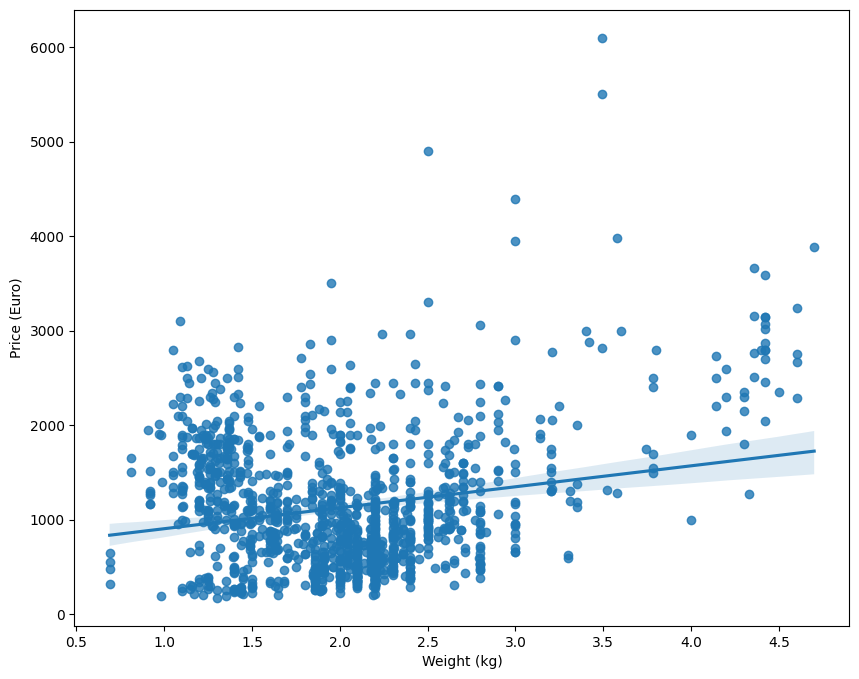

In [19]:
# Mengecek hubungan antara fitur Weight vs Price (Scatterplot)
plt.figure(figsize=(10, 8))
sns.regplot(data=df, x='Weight (kg)', y='Price (Euro)')

Untuk korelasi antar Weight dengan Price menunjukan pola titik dan garis yang cukup mendatar ini menunjukan bahwa korelasi antar dua kolom tersebut tidak terlalu signifikan

<a id='Preparation'></a>
# Data Preparation
<hr>
Pada bagian Data Preparation data akan diproses terlebih dahulu sebelum diinput ke model

### Handle Missing Values
Karena tidak ada kolom yang memiliki missing values/NaN maka tidak perlu dilakukan cleaning/imputasi

### Drop Duplicate
Karena tidak ada data yang bersifat duplikat maka tidak perlu dilakukan penghapusan duplikat

### Winsorize Outlier
Teknik penanganan outlier dengan cara membatasi (mengganti) nilai ekstrem menjadi nilai batas tertentu, bukan menghapus datanya.

In [20]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    df[col] = df[col].clip(lower, upper)

In [21]:
df.drop(columns='Product', inplace=True)

### Feature Engineering
Proses mengolah, memodifikasi, dan memilih fitur yang sudah ada untuk membentuk fitur baru yang lebih informatif, sehingga dapat meningkatkan kinerja dan kemampuan prediksi model.

In [22]:
# Feature Engineering pertama

# Mengecek apakah ada kata 'Touchscreen' (1 jika ada, 0 jika tidak)
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
# Mengecek apakah layar menggunakan panel 'IPS' (1 jika ada, 0 jika tidak)
df['IPS_Panel'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

Karena nilai unik dari kolom screen resolution cukup banyak, jadi fungsi kode ini adalah mengambil nilai yang memiliki kata kunci 'IPS' dan 'Touchscreen' saja dan membuat kolom baru dari data tersebut

In [23]:
# Feature Engineering kedua

def extract_resolution(res_str):
    res = re.findall(r'(\d+)x(\d+)', res_str)
    if res:
        return int(res[0][0]), int(res[0][1])
    return None, None
# Membuat kolom baru 'Res_Width' dan 'Res_Height' dari hasil ekstraksi
df['Res_Width'], df['Res_Height'] = zip(*df['ScreenResolution'].apply(extract_resolution))
# Hapus kolom asli karena informasinya sudah dipindah ke fitur baru
df.drop(columns=['ScreenResolution'], inplace=True)

Fungsi extract_resolution dibuat untuk mengekstrak informasi resolusi layar dari kolom ScreenResolution, yang awalnya berbentuk teks seperti 1920x1080 atau 1366x768, kemudian mengubahnya menjadi dua fitur numerik, yaitu lebar layar (width) dan tinggi layar (height).

In [24]:
# Feature engineering ketiga

def parse_memory(mem_str):
    # 1. Standarisasi Format:
    # Menghapus desimal yang tidak perlu agar pemrosesan teks lebih konsisten.
    mem_str = str(mem_str).replace('.0', '')
    # Beberapa laptop punya dua penyimpanan (dual storage). Dipecah pecah berdasarkan tanda '+'.
    parts = mem_str.split('+')
    # Menyiapkan wadah (dictionary) untuk menampung total kapasitas tiap jenis penyimpanan.
    res = {'SSD': 0, 'HDD': 0, 'Flash Storage': 0, 'Hybrid': 0}

    for part in parts:
        part = part.strip()
        # 2. Ekstraksi Angka dan Satuan:
        # Mencari pola angka yang diikuti oleh 'GB' atau 'TB'.
        match = re.search(r'(\d+)(GB|TB)', part)
        if match:
            val = int(match.group(1)) # Mengambil angka
            unit = match.group(2) # Mengambil Satuannya

            if unit == 'TB': val *= 1024 # Konversi Terabyte ke Gigabyte

            # 4. Klasifikasi Jenis Penyimpanan:
            # Mengecek apakah teks mengandung kata 'SSD', 'HDD', dsb., lalu menambahkan nilainya.
            for storage_type in res.keys():
                if storage_type in part:
                    res[storage_type] += val
                    break
    return pd.Series(res)

# 6. Transformasi Dataframe:
# Menjalankan fungsi pada tiap baris dan menggabungkan kolom-kolom ke dataframe utama.
mem_cols = df['Memory'].apply(parse_memory)
df = pd.concat([df, mem_cols], axis=1)
# Menghapus kolom 'Memory' asli karena datanya sudah terdistribusi ke kolom numerik yang baru
df.drop(columns=['Memory'], inplace=True)

Fungsi parse_memory dibuat untuk mengkonversi teks kapasitas penyimpanan dari kolom Memory menjadi nilai numerik dalam satuan Gigabyte (GB). Dengan proses ini, data laptop yang memiliki penyimpanan ganda seperti “256GB SSD + 1TB HDD” dapat diproses tanpa error, di mana kapasitas SSD akan dicatat sebesar 256 GB dan kapasitas HDD akan dikonversi menjadi 1024 GB.

Mengelompokkan variasi CPU dan GPU dan yang jarang muncul menjadi satu kategori "Other".

In [25]:
# Feature engineering keempat

# Ekstraksi Nama General:
# Ambil 3 kata pertama dari CPU (misal: "Intel Core i7")
# dan 2 kata pertama dari GPU (misal: "Nvidia GeForce").
# Tujuannya agar model fokus pada seri utama, bukan detail teknis yang terlalu spesifik.
df['CPU_Model'] = df['CPU_Type'].apply(lambda x: " ".join(x.split()[:3]))
df['GPU_Model'] = df['GPU_Type'].apply(lambda x: " ".join(x.split()[:2]))

# Cari 15 model CPU dan GPU yang paling sering muncul di dataset.
# Model di luar daftar Top 15 ini biasanya jumlahnya sedikit dan bisa bikin model "bingung" (overfitting).
# Strategi "Other": Masukkan model yang jarang muncul ke kategori 'Other'
top_cpus = df['CPU_Model'].value_counts().nlargest(15).index
df['CPU_Model'] = df['CPU_Model'].apply(lambda x: x if x in top_cpus else 'Other')
top_gpus = df['GPU_Model'].value_counts().nlargest(15).index
df['GPU_Model'] = df['GPU_Model'].apply(lambda x: x if x in top_gpus else 'Other')

# Hapus kolom asli 'CPU_Type' dan 'GPU_Type' karena sudah digantikan oleh versi yang lebih rapi.
df.drop(columns=['CPU_Type', 'GPU_Type'], inplace=True)

Dari feature engineering yang terakhir ini, akan mengambil nama seri utama CPU dan GPU dari kolom CPU_Type dan GPU_Type lalu memilih 15 model CPU dan GPU yang paling sering muncul lalu mengelompokan model yang jarang muncul ke kategori Other. Tujuanya adalah untuk menghindari overfitting dan membuat model fokus pada pola penting

### Encoding
Tahap untuk mengubah kolom kategorikal menjadi numerikal

In [30]:
categorical_cols = ['Company', 'TypeName', 'CPU_Company', 'CPU_Model', 'GPU_Company', 'GPU_Model', 'OpSys']
df_encode = pd.get_dummies(df, columns=categorical_cols, drop_first=True).astype(int)

### Feature Selection
Proses memilih sebagian fitur terbaik dan membuang sisanya agar:

- Model lebih sederhana

- Overfitting berkurang

- Deploy lebih mudah

In [31]:
pd.set_option('display.max_columns', None)
df_encode

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro),Touchscreen,IPS_Panel,Res_Width,Res_Height,SSD,HDD,Flash Storage,Hybrid,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,CPU_Company_Intel,CPU_Company_Samsung,CPU_Model_Core i3 6006U,CPU_Model_Core i3 7100U,CPU_Model_Core i5 6200U,CPU_Model_Core i5 7200U,CPU_Model_Core i5 7300HQ,CPU_Model_Core i5 7300U,CPU_Model_Core i5 8250U,CPU_Model_Core i7 6500U,CPU_Model_Core i7 6600U,CPU_Model_Core i7 6700HQ,CPU_Model_Core i7 7500U,CPU_Model_Core i7 7700HQ,CPU_Model_Core i7 8550U,CPU_Model_Other,CPU_Model_Pentium Quad Core,GPU_Company_ARM,GPU_Company_Intel,GPU_Company_Nvidia,GPU_Model_GeForce 930MX,GPU_Model_GeForce 940MX,GPU_Model_GeForce GTX,GPU_Model_GeForce MX150,GPU_Model_HD Graphics,GPU_Model_Iris Plus,GPU_Model_Other,GPU_Model_Quadro M1200,GPU_Model_Radeon 520,GPU_Model_Radeon 530,GPU_Model_Radeon R2,GPU_Model_Radeon R5,GPU_Model_Radeon R7,GPU_Model_Radeon RX,GPU_Model_UHD Graphics,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,13,2,8,1,1339,0,1,2560,1600,128,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,13,1,8,1,898,0,0,1440,900,0,0,128,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,15,2,8,1,575,0,0,1920,1080,256,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,15,2,14,1,2537,0,1,2880,1800,512,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,13,3,8,1,1803,0,1,2560,1600,256,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,14,2,4,1,638,1,1,1920,1080,128,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1271,13,2,14,1,1499,1,1,3200,1800,512,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1272,14,1,2,1,229,0,0,1366,768,0,0,64,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1273,15,2,6,2,764,0,0,1366,768,0,1024,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [33]:
feature_selection = ['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)', 'Touchscreen', 'SSD', 'Res_Width', 'Res_Height', 'IPS_Panel', 'HDD','Company_Apple',	'Company_Asus',	'Company_Chuwi'	,'Company_Dell',	'Company_Fujitsu',	'Company_Google','Company_HP',	'Company_Huawei',	'Company_LG',	'Company_Lenovo',	'Company_MSI',	'Company_Mediacom',	'Company_Microsoft',	'Company_Razer',	'Company_Samsung',	'Company_Toshiba',	'Company_Vero',	'Company_Xiaomi',	 'Price (Euro)']
df_final = df_encode[feature_selection]

### Split train & test

Train–test split berfungsi untuk membagi dataset menjadi dua bagian:

* Data train → untuk melatih model

* Data test → untuk menguji performa model pada data yang belum pernah dilihat

In [34]:
X = df_final.drop(columns=['Price (Euro)'])
y = df_final['Price (Euro)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling
Proses menyesuaikan skala nilai fitur agar berada pada rentang yang sebanding, sehingga model dapat belajar dengan lebih optimal.

In [36]:
## Normalisasi menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<a id='Modelling'></a>
# Modelling
<hr>
Tahap pembuatan dan pelatihan model untuk mempelajari pola dari data dan menghasilkan prediksi atau keputusan berdasarkan tujuan yang telah ditentukan.

### Linear Regression


Linear Regression digunakan untuk memprediksi nilai dengan cara mencari garis lurus terbaik yang menggambarkan hubungan antara:
- Fitur (X)
- Target (y)
Cara kerjanya bisa dilihat dari contoh regresi plot dibawah ini :

<Axes: xlabel='RAM (GB)', ylabel='Price (Euro)'>

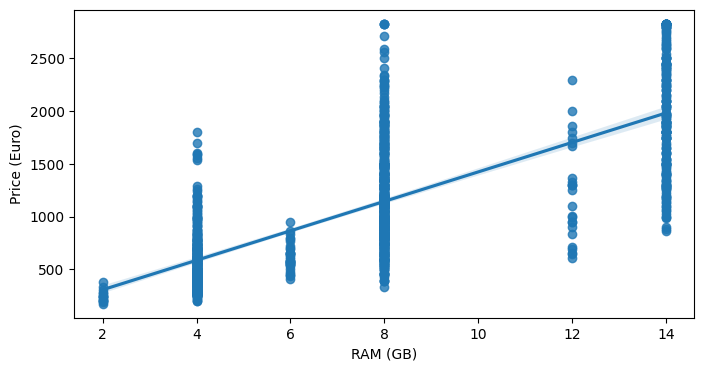

In [37]:
plt.figure(figsize=(8, 4))
sns.regplot(data=df, x='RAM (GB)', y='Price (Euro)')

Visual Sederhana

- Titik-titik → data asli

- Garis → hasil prediksi model

- Jarak titik ke garis → error

Semakin dekat titik ke garis, semakin baik modelnya.


Jadi dapat dikatakan Linear regression ini bekerja dengan mencari garis lurus terbaik yang meminimalkan selisih antara nilai prediksi dan nilai aktual, sehingga dapat digunakan untuk memprediksi nilai berdasarkan hubungan linear antar variabel.

### Training Model
Melatih model (LinearRegression) dengan mempelajari data training

In [38]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

Melakukan prediksi pada data train dan test

In [39]:
# Prediksi pada data train
y_train_pred = model.predict(X_train_scaled)

# Prediksi pada data test
y_test_pred = model.predict(X_test_scaled)

<a id='Evaluation'></a>
# Evaluation Model
<hr>
Tujuan evaluasi model untuk menilai seberapa baik model memprediksi nilai aktual dan memastikan model dapat digeneralisasi ke data baru.

### Evaluation Metrics
Menggunakan MAE, MSE, RMSE, R²
* MAE: rata-rata kesalahan absolut
* MSE: rata-rata kuadrat kesalahan
* R²: seberapa baik model menjelaskan variasi data

In [40]:
print("Data Train")
print("MAE :", mean_absolute_error(y_train, y_train_pred))
print("MSE :", mean_squared_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Akurasi pada data train (R2) adalah  :", r2_score(y_train, y_train_pred))

print("\nData Test")
print("MAE :", mean_absolute_error(y_test, y_test_pred))
print("MSE :", mean_squared_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Akurasi pada data test (R2) adalah  :", r2_score(y_test, y_test_pred))

Data Train
MAE : 269.6742191852877
MSE : 131432.553965258
RMSE: 362.53627951593757
Akurasi pada data train (R2) adalah  : 0.6889439320057641

Data Test
MAE : 271.26447386266767
MSE : 122807.29405611673
RMSE: 350.4387165484384
Akurasi pada data test (R2) adalah  : 0.6838029690942093


### Mengukur Akurasi Prediksi Menggunakan Visualisasi Scatterplot

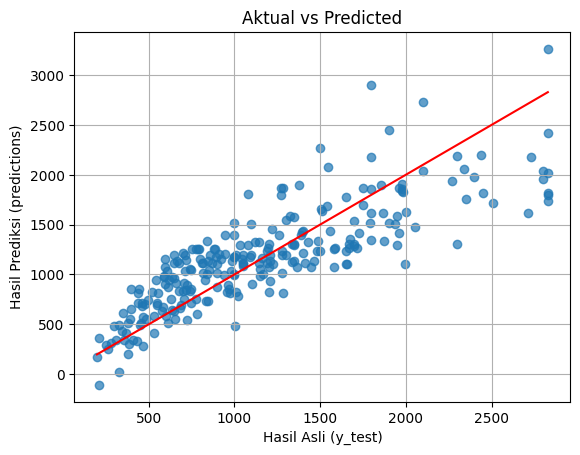

In [41]:
# Untuk data real
# Plot untuk mengetahui seberapa akurat hasil prediksi dengan hasil aslinya pada data test
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.xlabel("Hasil Asli (y_test)")
plt.ylabel("Hasil Prediksi (predictions)")
plt.title("Aktual vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # garis ideal
plt.grid(True)
plt.show()

* Titik-titik banyak berada di dekat garis merah (garis ideal), artinya model mendekati nilai aktual namun tidak terlihat indikasi overfitting
* Pola linear terlihat cukup jelas, artinya model cukup baik menangkap hubungan linear antar fitur dan target

<a id='Deployment'></a>
# Deployment
<hr>
Deployment adalah tahap penerapan model machine learning yang sudah dilatih agar dapat digunakan kembali tanpa melakukan training ulang.

Pada tahap ini:
- Model disimpan dalam file .pkl menggunakan joblib.
- Model dapat dimuat kembali kapan saja.
- Model digunakan untuk memprediksi data baru.
- Model siap diintegrasikan ke aplikasi web, sistem, atau dashboard.
- Tujuan deployment adalah agar model dapat digunakan secara nyata untuk membantu pengambilan keputusan.


In [43]:
import joblib

joblib.dump(model, 'prediksi_model_linear_TEKREK.pkl')
joblib.dump(scaler, 'scaler_linear_TEKREK.pkl')
df_final.to_csv('data_final1_TEKREK.csv')

# Sumber dan Referensi

- Iron Wolf. Laptop-price dataset [Dataset]. Kaggle. https://www.kaggle.com/datasets/ironwolf437/laptop-price-dataset
- Chapman, et al. CRISP-DM 4-phase diagram. KDnuggets, 2000, https://www.kdnuggets.com/wp-content/uploads//crisp-dm-4-problems-fig1.png


---


Copyright © 2025 by Pengelola MK Praktikum Unggulan (Praktikum DGX), Universitas Gunadarma


https://www.praktikum-hpc.gunadarma.ac.id/ <br>
https://www.hpc-hub.gunadarma.ac.id/ <br>